In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install xlrd==1.2.0
import xlrd

In [61]:
dataframe = pd.read_excel('https://github.com/HungThinhLuu/ASSIGNMENT_2/raw/master/testing.xls')

In [62]:
dataframe.head(10)

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N
5,39,2019-04-01,18:54:46,3,17,664,Y,1,1,32,1,3.00,3.00,N
6,50,2019-04-01,13:03:49,3,12,316,N,1,1,49,2,6.00,3.00,N
7,53,2019-04-01,11:21:14,3,12,38,N,1,1,60,1,3.75,3.75,N
8,59,2019-04-01,19:30:55,3,12,370,Y,1,1,51,2,6.00,3.00,N
9,62,2019-04-01,12:01:00,3,12,180,Y,1,1,49,2,6.00,3.00,N


Giải thích một số ý nghĩa của các biến:

    transaction_id: Mã giao dịch
    transaction_date: Ngày thực hiện giao dịch
    transaction_time: Thời gian thực hiện giao dịch
    sales_outlet_id: Mã cửa hàng giao dịch
    staff_id: Mã nhân viên giao dịch
    customer_id: Mã Khách hàng
    instore_yn: Có dùng tại quán hay không
    order:
    line_item_id:
    product_id: Mã sản phẩm
    quantity: Số lượng
    line_item_amount:
    unit_price: Giá bán đơn vị
    promo_item_yn:

In [63]:
dataframe.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
sales_outlet_id     0
staff_id            0
customer_id         0
instore_yn          0
order               0
line_item_id        0
product_id          0
quantity            0
line_item_amount    0
unit_price          0
promo_item_yn       0
dtype: int64

In [64]:
dataframe['instore_yn'].unique()

array(['N', 'Y', ' '], dtype=object)

In [65]:
dataframe['promo_item_yn'].unique()

array(['N', 'Y'], dtype=object)

In [66]:
dataframe['promo_item_yn'][dataframe['promo_item_yn'] == 'N'] = 0
dataframe['promo_item_yn'][dataframe['promo_item_yn'] == 'Y'] = 1
dataframe['instore_yn'][dataframe['instore_yn'] == 'N'] = 0
dataframe['instore_yn'][dataframe['instore_yn'] == 'Y'] = 1
dataframe['instore_yn'][dataframe['instore_yn'] == ' '] = 1

<ipython-input-66-d881080ff22c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['promo_item_yn'][dataframe['promo_item_yn'] == 'N'] = 0
<ipython-input-66-d881080ff22c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['promo_item_yn'][dataframe['promo_item_yn'] == 'Y'] = 1
<ipython-input-66-d881080ff22c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['instore_yn'][dataframe['instore_yn'] == 'N'] = 0
<ipy

In [67]:
dataframe['transaction_time'] = pd.Series([i.hour for i in dataframe['transaction_time']])

In [68]:
dataframe.head()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,12,3,12,558,0,1,1,52,1,2.50,2.50,0
1,11,2019-04-01,15,3,17,781,0,1,1,27,2,7.00,3.50,0
2,19,2019-04-01,14,3,17,788,1,1,1,46,2,5.00,2.50,0
3,32,2019-04-01,16,3,12,683,0,1,1,23,2,5.00,2.50,0
4,33,2019-04-01,19,3,17,99,1,1,1,34,1,2.45,2.45,0


In [69]:
dataframe.dtypes

transaction_id               int64
transaction_date    datetime64[ns]
transaction_time             int64
sales_outlet_id              int64
staff_id                     int64
customer_id                  int64
instore_yn                  object
order                        int64
line_item_id                 int64
product_id                   int64
quantity                     int64
line_item_amount           float64
unit_price                 float64
promo_item_yn               object
dtype: object

#CHART 


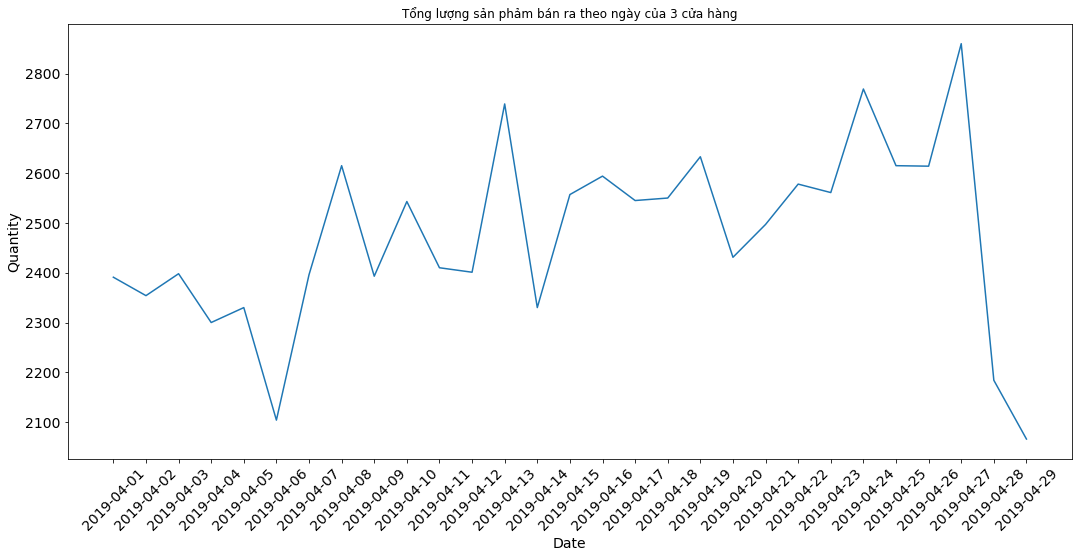

In [70]:
df = dataframe.groupby('transaction_date').sum()
plt.figure(figsize = (18,8))
plt.plot(df.index, df['quantity'])
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Quantity', fontsize = 14)
plt.xticks(df.index, rotation = 45, fontsize = 14)
plt.yticks(fontsize = 14)
plt.title("Tổng lượng sản phảm bán ra theo ngày của 3 cửa hàng")
plt.show()

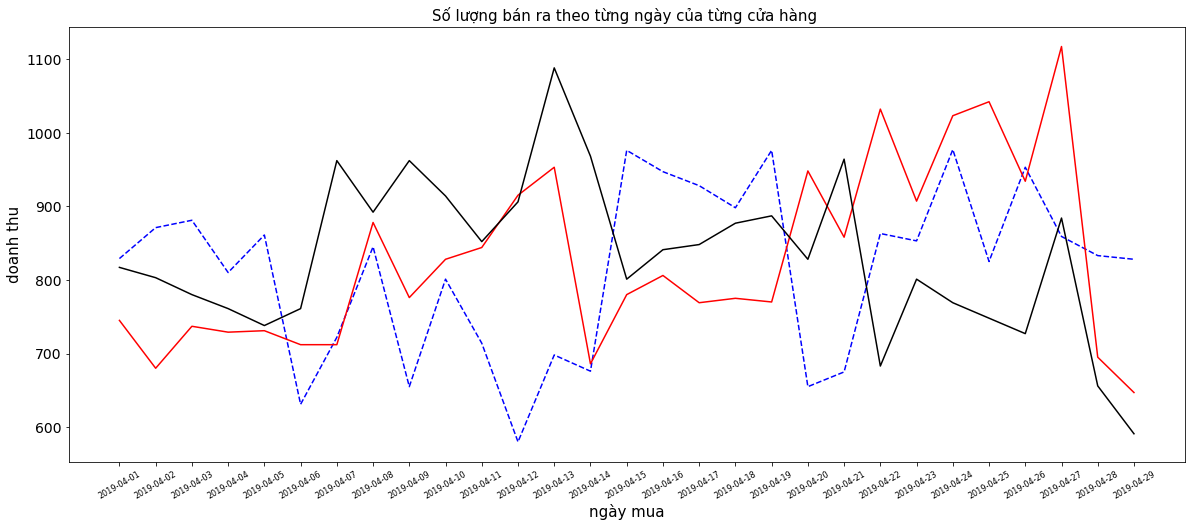

In [71]:
cuahangso3 = dataframe[dataframe['sales_outlet_id'] == 3]
cuahangso5 = dataframe[dataframe['sales_outlet_id'] == 5]
cuahangso8 = dataframe[dataframe['sales_outlet_id'] == 8]

df = cuahangso3.groupby('transaction_date').sum()
df1 = cuahangso5.groupby('transaction_date').sum()
df2 = cuahangso8.groupby('transaction_date').sum()

plt.figure(figsize = (20,8))
plt.plot(df.index, df['quantity'], color ="blue",linestyle="dashed", label="cửa hàng số 3");
plt.plot(df1.index, df1['quantity'], color = "red",  label="cửa hàng số 5");
plt.plot(df2.index, df2['quantity'], color = "black",  label="cửa hàng số 8");

plt.title("Số lượng bán ra theo từng ngày của từng cửa hàng ", fontsize = 15)
plt.xlabel('ngày mua', fontsize = 15)
plt.ylabel('doanh thu', fontsize = 15)
plt.xticks(df.index, rotation = 30, fontsize = 8)
plt.yticks(fontsize = 14)
plt.show()

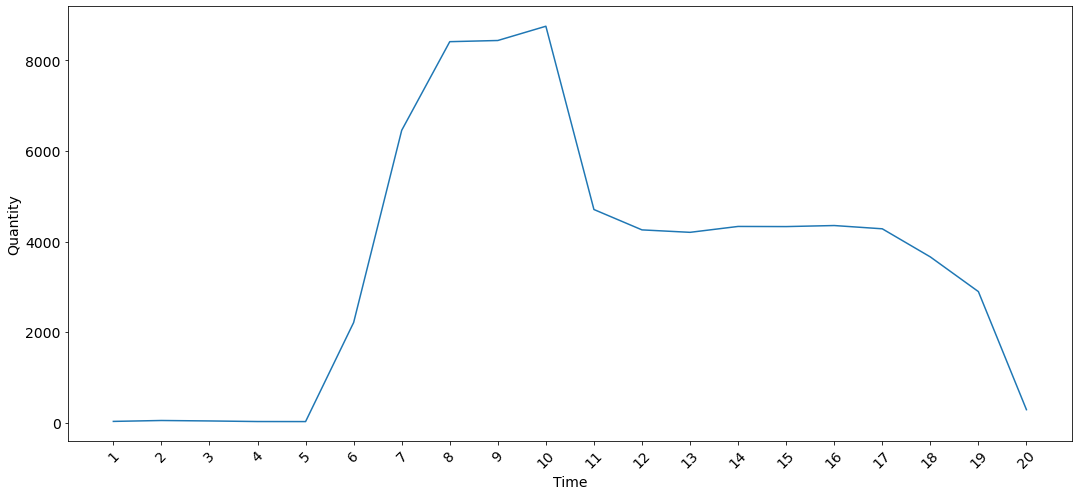

In [72]:
df = dataframe.groupby('transaction_time').sum()
plt.figure(figsize = (18,8))
plt.plot(df.index, df['quantity'])
plt.xlabel('Time', fontsize = 14)
plt.ylabel('Quantity', fontsize = 14)
plt.xticks(df.index, rotation = 45, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

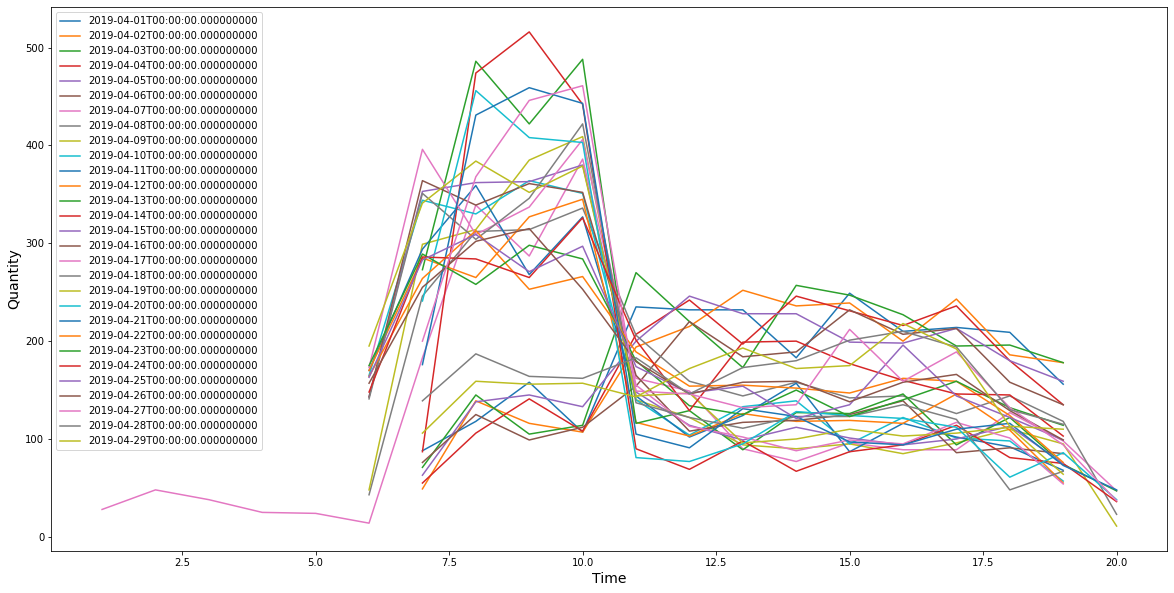

[numpy.datetime64('2019-04-07T00:00:00.000000000'),
 numpy.datetime64('2019-04-08T00:00:00.000000000'),
 numpy.datetime64('2019-04-09T00:00:00.000000000'),
 numpy.datetime64('2019-04-10T00:00:00.000000000'),
 numpy.datetime64('2019-04-11T00:00:00.000000000'),
 numpy.datetime64('2019-04-12T00:00:00.000000000'),
 numpy.datetime64('2019-04-13T00:00:00.000000000'),
 numpy.datetime64('2019-04-14T00:00:00.000000000'),
 numpy.datetime64('2019-04-15T00:00:00.000000000'),
 numpy.datetime64('2019-04-16T00:00:00.000000000'),
 numpy.datetime64('2019-04-17T00:00:00.000000000'),
 numpy.datetime64('2019-04-18T00:00:00.000000000'),
 numpy.datetime64('2019-04-19T00:00:00.000000000'),
 numpy.datetime64('2019-04-20T00:00:00.000000000'),
 numpy.datetime64('2019-04-21T00:00:00.000000000'),
 numpy.datetime64('2019-04-22T00:00:00.000000000'),
 numpy.datetime64('2019-04-24T00:00:00.000000000'),
 numpy.datetime64('2019-04-25T00:00:00.000000000'),
 numpy.datetime64('2019-04-26T00:00:00.000000000'),
 numpy.datet

In [73]:
buf = []
plt.figure(figsize = (20,10))
for date in dataframe['transaction_date'].unique():
  df = dataframe[dataframe['transaction_date'] == date]
  df = df.groupby('transaction_time').sum()
  if (df['quantity'] > 300).sum() != 0:
    buf.append(date)
  plt.plot(df.index, df['quantity'], label=date)
plt.xlabel('Time', fontsize = 14)
plt.ylabel('Quantity', fontsize = 14)
plt.legend(loc='best')
plt.show()
buf

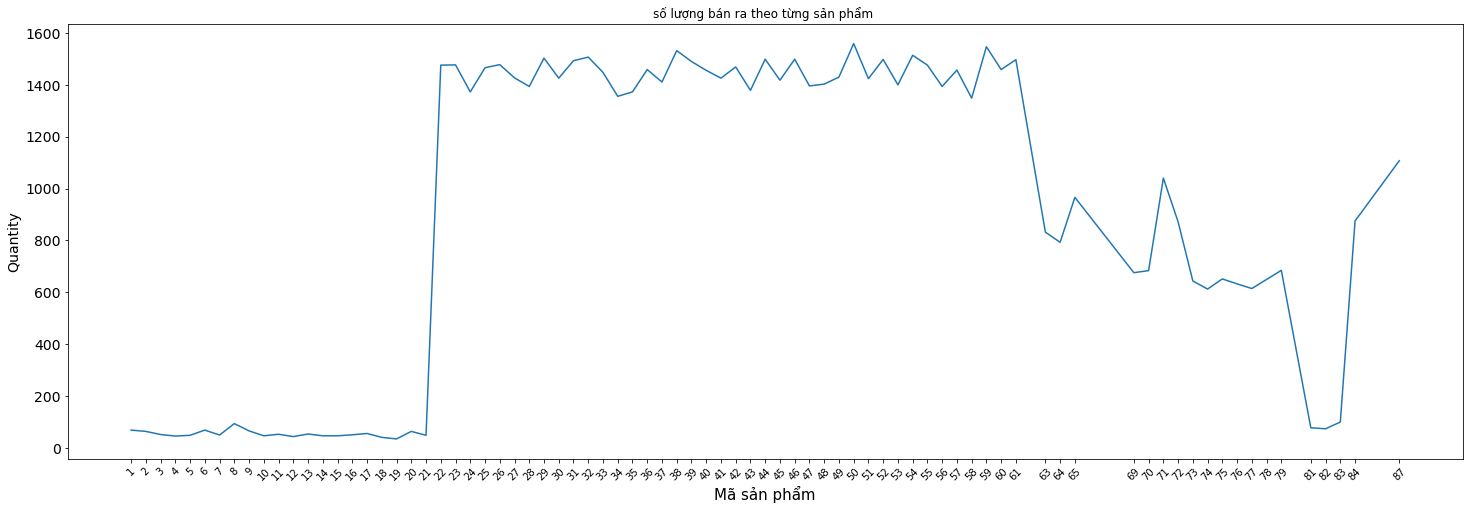

In [74]:
df = dataframe.groupby('product_id').sum()
plt.figure(figsize = (25,8))
plt.plot(df.index, df['quantity'])
plt.title("số lượng bán ra theo từng sản phẩm ")
plt.xlabel('Mã sản phẩm', fontsize = 15)
plt.ylabel('Quantity', fontsize = 14)
plt.xticks(df.index, rotation = 45, fontsize = 10)
plt.yticks(fontsize = 14)
plt.show()

In [75]:
df = dataframe.groupby('sales_outlet_id').sum()
print(df['line_item_amount'], df['quantity'])

sales_outlet_id
3    77213.23
5    76894.47
8    79528.25
Name: line_item_amount, dtype: float64 sales_outlet_id
3    23620
5    24029
8    24109
Name: quantity, dtype: int64


# machine learning 



<AxesSubplot:>

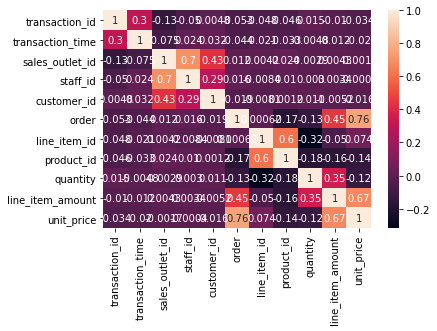

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(dataframe.corr(), annot = True,  )


In [77]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [78]:
dataframe.columns


Index(['transaction_id', 'transaction_date', 'transaction_time',
       'sales_outlet_id', 'staff_id', 'customer_id', 'instore_yn', 'order',
       'line_item_id', 'product_id', 'quantity', 'line_item_amount',
       'unit_price', 'promo_item_yn'],
      dtype='object')

In [79]:
dataframe['instore_yn'] = dataframe['instore_yn'].astype('int64')
dataframe['promo_item_yn'] = dataframe['promo_item_yn'].astype('int64')

# dự đoán thức uống sẽ được dùng nhiều

Chọn đặc trưng

In [80]:
target_y = dataframe['product_id']

drink_train_x = dataframe[['transaction_id', 'transaction_time',
       'sales_outlet_id', 'staff_id', 'customer_id', 'instore_yn', 'order',
       'line_item_id', 'quantity', 'line_item_amount',
       'unit_price', 'promo_item_yn']]

In [99]:
target_y.head()

7687     50
31865    55
10698    53
42967    32
9844     55
Name: product_id, dtype: int64

In [81]:
drink_train_x.info(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    49894 non-null  int64  
 1   transaction_time  49894 non-null  int64  
 2   sales_outlet_id   49894 non-null  int64  
 3   staff_id          49894 non-null  int64  
 4   customer_id       49894 non-null  int64  
 5   instore_yn        49894 non-null  int64  
 6   order             49894 non-null  int64  
 7   line_item_id      49894 non-null  int64  
 8   quantity          49894 non-null  int64  
 9   line_item_amount  49894 non-null  float64
 10  unit_price        49894 non-null  float64
 11  promo_item_yn     49894 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 4.6 MB


In [82]:
drink_train_x.head(3)

,transaction_id,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,12,3,12,558,0,1,1,1,2.5,2.5,0
1,11,15,3,17,781,0,1,1,2,7.0,3.5,0
2,19,14,3,17,788,1,1,1,2,5.0,2.5,0


In [83]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(drink_train_x,drink_target)
dfscores = np.array(fit.scores_)
dfcolumns = np.array(drink_train_x.columns)
featureScores = pd.DataFrame({"Feature":dfcolumns,"Score":dfscores})
featureScores['Score'] =featureScores['Score'].apply(lambda x : round(x,2))
featureScores = featureScores.sort_values(['Score'], ascending = False)
featureScores

,Feature,Score
4,customer_id,1256894.38
0,transaction_id,623206.91
10,unit_price,105719.89
9,line_item_amount,103387.80
7,line_item_id,52686.98
6,order,40720.33
11,promo_item_yn,15268.98
3,staff_id,1888.20
8,quantity,1355.21
1,transaction_time,500.98


In [84]:
print(dataframe['customer_id'].unique())

[ 558  781  788 ... 5759 5551 5668]


In [85]:
print(dataframe['customer_id'].value_counts())

0       25033
8285       31
548        31
3          31
8341       29
        ...  
5589        1
5147        1
5076        1
359         1
427         1
Name: customer_id, Length: 2248, dtype: int64


In [86]:
logitis_model = LogisticRegression().fit(drink_train_x, drink_target)
de_model = DecisionTreeClassifier().fit(drink_train_x,drink_target)
Gau_model= GaussianNB().fit(drink_train_x,drink_target)
random_model = RandomForestClassifier().fit(drink_train_x,drink_target)
knn_model = KNeighborsClassifier().fit(drink_train_x,drink_target)

C:\Users\lequo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
drink_target.shape

(49894,)

In [88]:
from sklearn.model_selection import train_test_split
drink_train_x,drink_valid_x,target_y,target_yvalid = train_test_split(drink_train_x,target_y, train_size=0.8, test_size = 0.2, random_state=0)

In [89]:
# target_y = dataframe['product_id']

#drink_train_x = dataframe[['transaction_id', 'transaction_time',
#           'sales_outlet_id', 'staff_id', 'customer_id', 'instore_yn', 'order',
#           'line_item_id', 'quantity', 'line_item_amount',
#           'unit_price', 'promo_item_yn']]

In [90]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=1)

In [91]:
regressor.fit(drink_train_x, target_y)

DecisionTreeRegressor(random_state=1)

In [92]:
huy = regressor.predict(drink_valid_x.head())

In [93]:
huy

array([26., 43., 87., 32., 76.])

In [98]:
pd.DataFrame({'target_y': target_yvalid.head(), 'huy': huy} )

,target_y,huy
48749,24,26.0
23099,37,43.0
44792,87,87.0
47706,24,32.0
32082,75,76.0
